In [11]:
### Load data IMU CSV dan dibersihkan tahap 1###
import pandas as pd
import emoji


# Baca data CSV
df = pd.read_excel('imudata_baru.xlsx')

# 1. Tampilkan info umum data
print(df.info())
print(df.head())

# 2. Buang kolom yang tidak relevan (ganti 'kolom_tidak_dipakai' sesuai kebutuhan)
# df.drop(columns=['kolom_tidak_dipakai'], inplace=True)

# 3. Tangani nilai hilang (missing values)
# Contoh: isi dengan median, hapus, atau metode lain
# df = df.dropna()  # jika ingin langsung membuang baris yang ada NaN
# df['kolom_angka'] = df['kolom_angka'].fillna(df['kolom_angka'].median())

# 4. Bersihkan data string, misalnya hapus spasi putih atau ubah ke lowercase
# df['nama_kolom'] = df['nama_kolom'].str.strip().str.lower()

# 5. Ubah tipe data jika perlu
# df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')
# df['angka'] = pd.to_numeric(df['angka'], errors='coerce')

# 6. Buang duplikat
df.drop_duplicates(inplace=True)

# 7. Simpan data yang sudah dibersihkan
df.to_csv('data_imu_clean1.csv', index=False)
print("Data berhasil dibersihkan dan disimpan sebagai 'data_imu_clean1.csv'")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ax      1085 non-null   object 
 1   ay      1085 non-null   object 
 2   az      1085 non-null   float64
 3   gx      1085 non-null   float64
 4   gy      1085 non-null   float64
 5   gz      1085 non-null   float64
 6   label   1085 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 59.5+ KB
None
         ax        ay        az        gx        gy        gz  label
0 -0.078629 -0.072346  0.328973 -0.030680 -0.117878 -0.096649      1
1  0.027023  0.135176  0.212524 -0.082713  0.010752  0.040630      1
2  0.127246   0.04087 -0.545340 -0.049066  0.074546  0.170800      1
3  0.009516  0.053802 -0.926224 -0.057500  0.105462 -0.438776      1
4 -0.006466  0.918721  0.430050 -0.146734  0.144089  0.588326      1
Data berhasil dibersihkan dan disimpan sebagai 'data_imu_clean1.csv'


In [12]:
import pandas as pd

# Load CSV dan paksa semua nilai ke bentuk numerik
df = pd.read_csv("data_imu_clean1.csv")

# Buang spasi putih di awal/akhir sel
df = df.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)

# Konversi semua kolom ke numeric jika bisa, dan paksa NaN jika gagal
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].map(lambda x: str(x).strip() if isinstance(x, str) else x)


# Drop baris dengan NaN akibat parsing gagal
df.dropna(inplace=True)
df.to_csv("data_imu_clean_01.csv", index=False)
print("File bersih disimpan sebagai: data_imu_oke_clean_01.csv")

print("Data berhasil dibersihkan dari nilai yang tidak bisa dikonversi.")


File bersih disimpan sebagai: data_imu_oke_clean_01.csv
Data berhasil dibersihkan dari nilai yang tidak bisa dikonversi.


/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_4642/2350362555.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)


In [13]:
### Visualisasi data IMU
import pandas as pd
import matplotlib.pyplot as plt

# Baca file CSV
df = pd.read_csv("data_imu_oke.csv")

# Tampilkan label unik
print("Label yang ditemukan:", df['label'].unique())

# Loop visualisasi per label
for label in sorted(df['label'].unique()):
    subset = df[df['label'] == label].reset_index(drop=True)

    fig, axs = plt.subplots(2, 1, figsize=(14, 6), sharex=True)
    fig.suptitle(f'Sinyal IMU - Label {label}', fontsize=16)

    # Akselerometer
    axs[0].plot(subset['ax'], label='Ax', alpha=0.7)
    axs[0].plot(subset['ay'], label='Ay', alpha=0.7)
    axs[0].plot(subset['az'], label='Az', alpha=0.7)
    axs[0].set_ylabel('Accelerometer (g)')
    axs[0].legend()
    axs[0].grid(True)

    # Gyroscope
    axs[1].plot(subset['gx'], label='Gx', alpha=0.7)
    axs[1].plot(subset['gy'], label='Gy', alpha=0.7)
    axs[1].plot(subset['gz'], label='Gz', alpha=0.7)
    axs[1].set_ylabel('Gyroscope (°/s)')
    axs[1].set_xlabel('Index Sampel')
    axs[1].legend()
    axs[1].grid(True)

Label yang ditemukan: [ 1  0 10]


In [1]:
import matplotlib.pyplot as plt

def plot_imu_combined(subset, save_path="imu_visual.png"):
    fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

    # Akselerometer
    axs[0].plot(subset['ax'], label='Ax', alpha=0.7)
    axs[0].plot(subset['ay'], label='Ay', alpha=0.7)
    axs[0].plot(subset['az'], label='Az', alpha=0.7)
    axs[0].set_ylabel('Accelerometer (g)')
    axs[0].set_title('Sinyal Akselerometer')
    axs[0].legend()
    axs[0].grid(True)

    # Gyroscope
    axs[1].plot(subset['gx'], label='Gx', alpha=0.7)
    axs[1].plot(subset['gy'], label='Gy', alpha=0.7)
    axs[1].plot(subset['gz'], label='Gz', alpha=0.7)
    axs[1].set_ylabel('Gyroscope (°/s)')
    axs[1].set_xlabel('Index Sampel')
    axs[1].set_title('Sinyal Gyroscope')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()
    plt.savefig(save_path, dpi=300)
    print(f" Grafik berhasil disimpan ke: {save_path}")
    plt.show()




Gambar disimpan sebagai: imu_2color_labels_axes.png


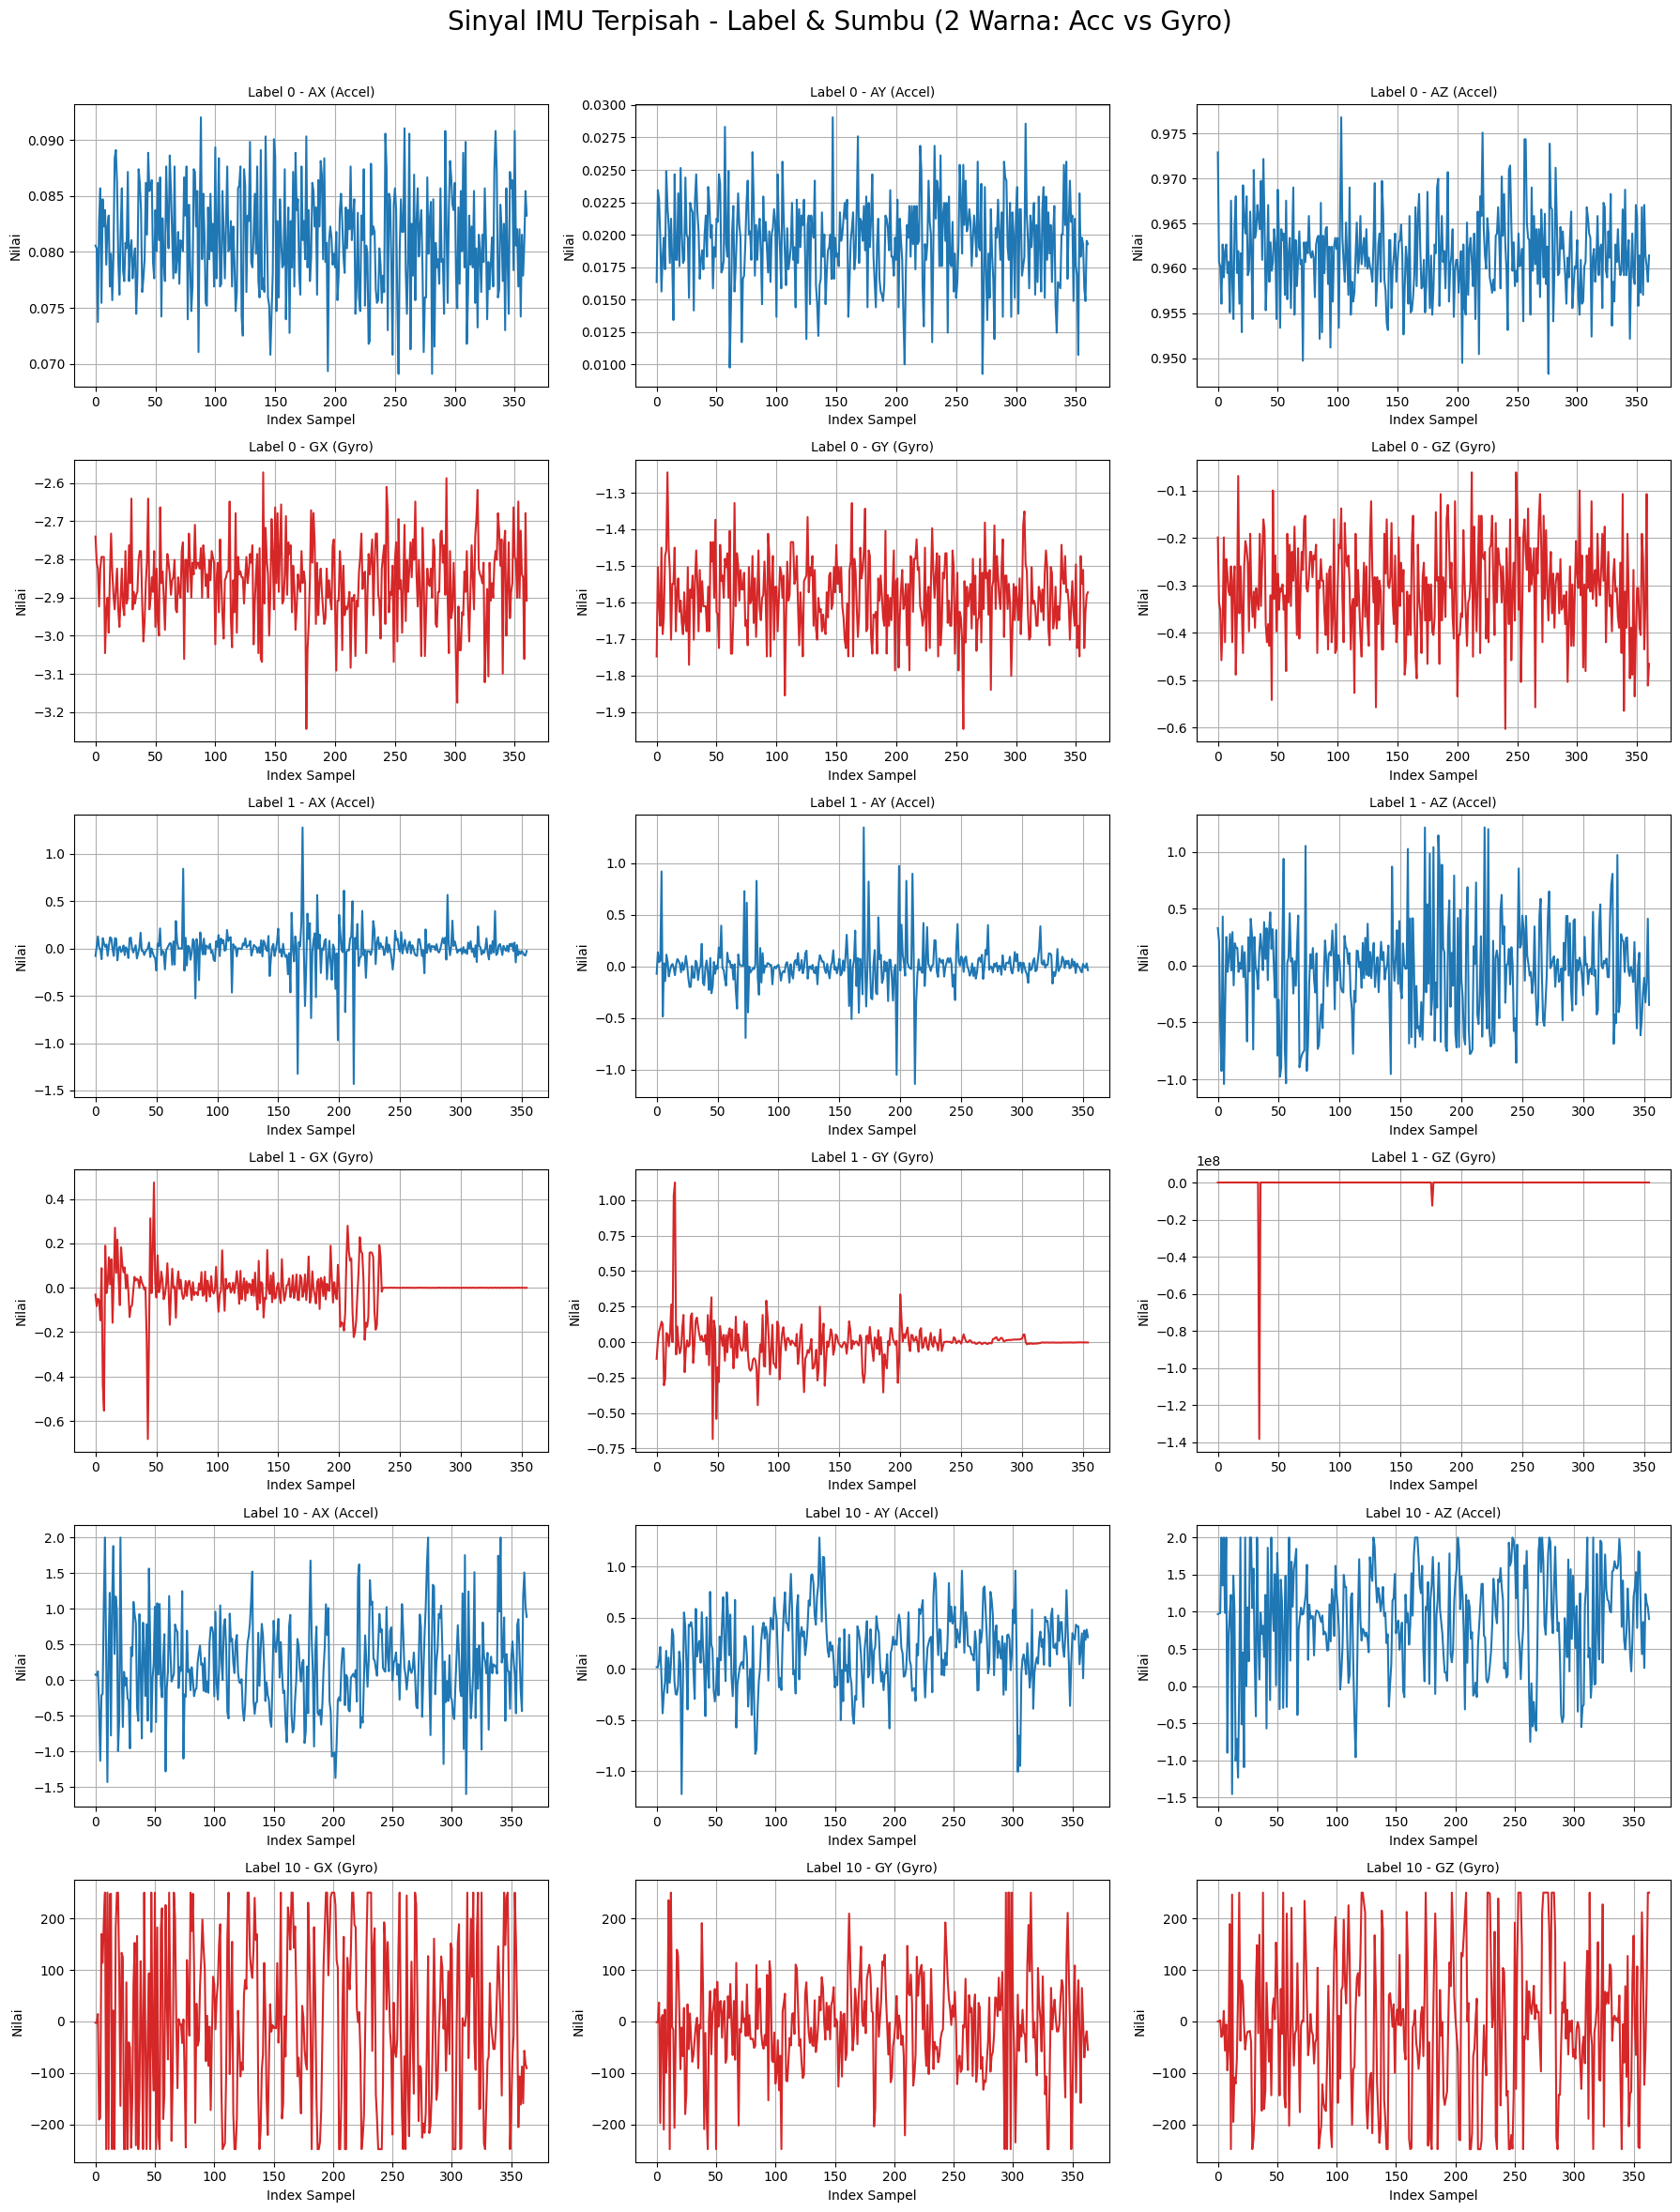

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("data_imu_oke.csv")
unique_labels = sorted(df['label'].unique())
axes_acc = ['ax', 'ay', 'az']
axes_gyro = ['gx', 'gy', 'gz']
total_plots = len(unique_labels) * (len(axes_acc) + len(axes_gyro))

# Definisi warna
acc_color = 'tab:blue'
gyro_color = 'tab:red'

# Buat grid subplot
cols = 3
rows = total_plots // cols + (total_plots % cols != 0)
fig, axs = plt.subplots(rows, cols, figsize=(18, 4 * rows))
fig.suptitle("Sinyal IMU Terpisah - Label & Sumbu (2 Warna: Acc vs Gyro)", fontsize=20)
axs = axs.flatten()

plot_idx = 0
for label in unique_labels:
    subset = df[df['label'] == label].reset_index(drop=True)

    for axis in axes_acc:
        axs[plot_idx].plot(subset[axis], color=acc_color)
        axs[plot_idx].set_title(f'Label {label} - {axis.upper()} (Accel)', fontsize=10)
        axs[plot_idx].set_xlabel('Index Sampel')
        axs[plot_idx].set_ylabel('Nilai')
        axs[plot_idx].grid(True)
        plot_idx += 1

    for axis in axes_gyro:
        axs[plot_idx].plot(subset[axis], color=gyro_color)
        axs[plot_idx].set_title(f'Label {label} - {axis.upper()} (Gyro)', fontsize=10)
        axs[plot_idx].set_xlabel('Index Sampel')
        axs[plot_idx].set_ylabel('Nilai')
        axs[plot_idx].grid(True)
        plot_idx += 1

# Kosongkan subplot sisa jika ada
for i in range(plot_idx, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("imu_2color_labels_axes.png", dpi=300)
print("Gambar disimpan sebagai: imu_2color_labels_axes.png")
plt.show()


In [3]:
import os

def export_all_label_tables(df, mode='csv', output_dir='exports'):
    os.makedirs(output_dir, exist_ok=True)

    if 'label' not in df.columns:
        raise ValueError("Kolom 'label' tidak ditemukan dalam dataframe.")

    for label in df['label'].unique():
        label_df = df[df['label'] == label].copy()
        filename_base = os.path.join(output_dir, f"label_{label}")

        if mode in ['csv', 'both']:
            label_df.to_csv(f"{filename_base}.csv", index=False)
        if mode in ['excel', 'both']:
            label_df.to_excel(f"{filename_base}.xlsx", index=False)

    print(f"✅ Data berhasil diekspor per-label ke folder '{output_dir}' dalam mode '{mode}'")

export_all_label_tables(df, mode='both')


✅ Data berhasil diekspor per-label ke folder 'exports' dalam mode 'both'


In [4]:
### cuplikan data IMU
import matplotlib
matplotlib.use('Agg')  # Backend non-GUI untuk menyimpan file

def export_all_label_tables(df, mode='both', save_prefix='cuplikan_per_label'):
    import matplotlib.pyplot as plt

    all_samples = []
    for label in sorted(df['label'].unique()):
        sample = df[df['label'] == label][['ax', 'ay', 'az', 'gx', 'gy', 'gz']]
        sample = sample.head(5).copy()
        sample['label'] = label  # Tambahkan label kolom
        all_samples.append(sample)

    df_combined = pd.concat(all_samples, ignore_index=True)

    if mode in ['latex', 'both']:
        latex_code = df_combined.to_latex(index=False)
        with open(f"{save_prefix}.tex", "w") as f:
            f.write(latex_code)
        print(f"LaTeX disimpan sebagai: {save_prefix}.tex")

    if mode in ['png', 'both']:
        fig, ax = plt.subplots(figsize=(12, max(2, len(df_combined) // 3)))
        ax.axis('off')
        tbl = ax.table(cellText=df_combined.values,
                       colLabels=df_combined.columns,
                       cellLoc='center',
                       loc='center')
        tbl.auto_set_font_size(False)
        tbl.set_fontsize(9)
        tbl.scale(1.2, 1.4)
        plt.title("Cuplikan Data IMU per Label (5 Baris)", fontsize=14)
        plt.tight_layout()
        plt.savefig(f"{save_prefix}.png", dpi=300)
        print(f"PNG disimpan sebagai: {save_prefix}.png")
        plt.close()
        plt.show()


In [5]:
#### Proses ekstract fitur FFT frekwensi dominan
import numpy as np
import pandas as pd
from scipy.stats import entropy
from scipy.fft import rfft

def extract_features(window):
    features = {}
    for axis in window.columns:
        signal = window[axis].values

        features[f'{axis}_mean'] = np.mean(signal)
        features[f'{axis}_std'] = np.std(signal)
        features[f'{axis}_max'] = np.max(signal)
        features[f'{axis}_min'] = np.min(signal)
        features[f'{axis}_energy'] = np.sum(signal**2)
        features[f'{axis}_entropy'] = entropy(np.histogram(signal, bins=20, density=True)[0] + 1e-8)

        # FFT: dominant frequency
        fft_vals = np.abs(rfft(signal))
        fft_freqs = np.fft.rfftfreq(len(signal), d=1)
        dom_freq = fft_freqs[np.argmax(fft_vals[1:]) + 1]  # skip DC
        features[f'{axis}_dominant_freq'] = dom_freq
    return features

def build_feature_dataframe_from_imu(df, fs=50, window_duration=2, stride_ratio=0.5):
    window_size = int(fs * window_duration)
    stride_size = int(window_size * stride_ratio)

    df = df.copy()
    df.columns = df.columns.str.strip().str.lower()

    data = []
    for start in range(0, len(df) - window_size + 1, stride_size):
        end = start + window_size
        window = df.iloc[start:end]
        if 'label' not in window.columns:
            continue

        label = window['label'].mode().values[0]
        window_data = window.drop(columns=['label'])

        feats = extract_features(window_data)
        feats['label'] = label
        data.append(feats)

    return pd.DataFrame(data)


In [6]:
### mulai FFT
# %%
import matplotlib.pyplot as plt


# kode lainnya...

import numpy as np
from scipy.fft import rfft, rfftfreq

def plot_fft_single_window(window, fs=50, save_path="fft_output.png"):
    window = window.drop(columns=['label'], errors='ignore')
    sample_count = window.shape[0]
    time_vector = np.arange(sample_count) / fs

    plt.figure(figsize=(12, 4 * len(window.columns)))

    for i, axis in enumerate(window.columns):
        signal = window[axis].values
        fft_vals = np.abs(rfft(signal))
        fft_freqs = rfftfreq(sample_count, d=1/fs)

        plt.subplot(len(window.columns), 1, i + 1)
        plt.plot(fft_freqs, fft_vals, color='darkorange')
        plt.title(f"FFT - Axis {axis}")
        plt.xlabel("Frekuensi (Hz)")
        plt.ylabel("Magnitudo")
        plt.grid(True)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')  # Simpan ke PNG sebelum show
    print(f"FFT disimpan sebagai: {save_path}")
    plt.show()
